# **Homestays Data analysis and price Prediction**

**Objective**: Build a robust predictive model to estimate the `log_price` of homestay listings based on comprehensive analysis of their characteristics, amenities, and host information.

**Details :**



*   Name : Khushi Shah
*   Contact : +91-8490021509
*   Email : shahkhushi.28k@gmail.com




In [34]:
#importing the dependencipes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from scipy.stats import f_oneway, kruskal

In [35]:
#Loading the dataset
data = pd.read_csv('/content/data.csv', encoding='latin1')

In [36]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [37]:
data.shape

(74111, 29)

In [38]:
first_row = data.iloc[0]

# Print features and sample values side-by-side
print("Features \t Sample Values")
print("------- \t --------------")
for col, value in first_row.items():
  print(f"{col} \t {value}")


Features 	 Sample Values
------- 	 --------------
id 	 6901257
log_price 	 5.010635294
property_type 	 Apartment
room_type 	 Entire home/apt
amenities 	 {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}
accommodates 	 3
bathrooms 	 1.0
bed_type 	 Real Bed
cancellation_policy 	 strict
cleaning_fee 	 True
city 	 NYC
description 	 Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.
first_review 	 18-06-2016
host_has_profile_pic 	 t
host_identity_verified 	 t
host_response_rate 	 nan
host_since 	 26-03-2012
instant_bookable 	 f
last_review 	 18-07-2016
latitude 	 40.69652363
longitude 	 -73.99161685
name 	 Beautiful brownstone 1-bedroom
neighbourhood 	 Brooklyn Heights
number_of_reviews 	 2
review_scores_rating 	 100.0
thumbnail_ur

**Data Preprocessing**

In [39]:
# Checking the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

**Insights** :
1. 13261 homestays with details across 29 columns.
2. Log-transformed price data suggests price prediction modeling.
3. Details on property type, size, and amenities offered.
4. Location data for geospatial analysis.
5. Textual descriptions and amenity listings for analysis.
6. Host information like verification and response rate.
7. Review data for understanding guest feedback.





In [40]:
# Check for missing values
print(data.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [41]:
# Imputing the missing values with mean for numeric columns and mode for categorical columns

def impute_missing_values(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)

# Impute missing values
impute_missing_values(data)

In [42]:
# Verifying if there are any missing values after imputation
print("Missing Values after Imputation:")
print(data.isnull().sum())

Missing Values after Imputation:
id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


In [43]:
# Checking duplicates
print(data.duplicated().sum())

0


In [44]:
# Converting the boolean values to integers
data['cleaning_fee'] = data['cleaning_fee'].astype(int)
data['instant_bookable'] = data['instant_bookable'].map({'f': 0, 't': 1})

In [45]:
# Converting the host_response_rate to numerical format (assuming percentage)
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype(float)

In [46]:
data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          9734
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: count, Length: 619, dtype: int64

In [47]:
# Labeling the encode categorical variables
label_encoder = LabelEncoder()
data['property_type'] = label_encoder.fit_transform(data['property_type'])
data['room_type'] = label_encoder.fit_transform(data['room_type'])
data['bed_type'] = label_encoder.fit_transform(data['bed_type'])
data['cancellation_policy'] = label_encoder.fit_transform(data['cancellation_policy'])
data['city'] = label_encoder.fit_transform(data['city'])
data['neighbourhood'] = label_encoder.fit_transform(data['neighbourhood'])

In [48]:
# Check if there are any remaining object columns
object_columns = data.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print("Remaining object columns:", object_columns)
else:
    print("All object columns converted to numerical format.")

Remaining object columns: Index(['amenities', 'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_since', 'last_review', 'name',
       'thumbnail_url', 'zipcode'],
      dtype='object')


In [49]:
# Map binary values to 1 and 0
data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'t': 1, 'f': 0})
data['host_identity_verified'] = data['host_identity_verified'].map({'t': 1, 'f': 0})

In [50]:
# Drop unnecessary columns
data.drop(['id', 'thumbnail_url','zipcode'], axis=1, inplace=True)

In [51]:
# Check if there are any remaining object columns
object_columns = data.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print("Remaining object columns:", object_columns)
else:
    print("All object columns converted to numerical format.")

Remaining object columns: Index(['amenities', 'description', 'first_review', 'host_since', 'last_review',
       'name'],
      dtype='object')


In [52]:
data['name'].value_counts()

name
#NAME?                                           10
Bunk bed in the Treat Street Clubhouse            8
East Village Studio                               7
Your home away from home                          7
Location, Location, Location                      6
                                                 ..
Loveable Crown Heights apt w/ yard                1
Charming studio apartment in Adams Morgan.        1
Studio City cozy studio w/ parking                1
SPACIOUS UPPER HAIGHT HOME IN THE HEART OF SF     1
Cozy Boat at Shoreline Village                    1
Name: count, Length: 73350, dtype: int64

In [53]:
# Drop rows with name '#NAME?'
data = data[data['name'] != '#NAME?']

In [54]:
data['name'].value_counts()

name
Bunk bed in the Treat Street Clubhouse           8
East Village Studio                              7
Your home away from home                         7
Location, Location, Location                     6
Cozy Private Room                                6
                                                ..
Loveable Crown Heights apt w/ yard               1
Charming studio apartment in Adams Morgan.       1
Studio City cozy studio w/ parking               1
SPACIOUS UPPER HAIGHT HOME IN THE HEART OF SF    1
Cozy Boat at Shoreline Village                   1
Name: count, Length: 73349, dtype: int64

In [55]:
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,2,1,4,...,0,18-07-2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,77,2,100.000000,1.0,1.0
1,5.129899,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,4,2,1,4,...,1,23-09-2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,252,6,93.000000,3.0,3.0
2,4.976734,0,0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,1,4,...,1,14-09-2017,40.808110,-73.943756,The Garden Oasis,247,10,92.000000,1.0,3.0
3,6.620073,17,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,0,1,5,...,0,30-04-2017,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,325,0,94.067365,2.0,2.0
4,4.744932,0,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,1,2,...,1,22-01-2017,38.925627,-77.034596,Great studio in midtown DC,119,4,40.000000,0.0,1.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74101 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74101 non-null  float64
 1   property_type           74101 non-null  int64  
 2   room_type               74101 non-null  int64  
 3   amenities               74101 non-null  object 
 4   accommodates            74101 non-null  int64  
 5   bathrooms               74101 non-null  float64
 6   bed_type                74101 non-null  int64  
 7   cancellation_policy     74101 non-null  int64  
 8   cleaning_fee            74101 non-null  int64  
 9   city                    74101 non-null  int64  
 10  description             74101 non-null  object 
 11  first_review            74101 non-null  object 
 12  host_has_profile_pic    74101 non-null  int64  
 13  host_identity_verified  74101 non-null  int64  
 14  host_response_rate      74101 non-null  flo

In [57]:
data.shape

(74101, 26)

In [59]:
# Calculate IQR for each numeric column
Q1 = np.percentile(data.select_dtypes(include=np.number), 25, axis=0)
Q3 = np.percentile(data.select_dtypes(include=np.number), 75, axis=0)
IQR = Q3 - Q1

# Identify outliers using IQR method
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Check for outliers in each numeric column
outliers = (data.select_dtypes(include=np.number) < lower_threshold) | (data.select_dtypes(include=np.number) > upper_threshold)

# Count the number of outliers in each column
num_outliers = outliers.sum()
print(num_outliers)

log_price                  1532
property_type                 0
room_type                     0
accommodates               3602
bathrooms                 16010
bed_type                   2083
cancellation_policy           0
cleaning_fee                  0
city                       7181
host_has_profile_pic        226
host_identity_verified        0
host_response_rate        12558
instant_bookable              0
latitude                      0
longitude                     0
neighbourhood                 0
number_of_reviews          8203
review_scores_rating       4622
bedrooms                  24324
beds                       5684
dtype: int64


In [60]:
# Standard Scaling for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [61]:
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,0.318587,-0.669091,-0.850632,"{""Wireless Internet"",""Air conditioning"",Kitche...",-0.071979,-0.404744,0.152824,1.010571,0.601894,0.598538,...,-0.596444,18-07-2016,0.730765,0.848013,Beautiful brownstone 1-bedroom,-1.347239,-0.499637,0.860255,-0.312076,-0.567329
1,0.484836,-0.669091,-0.850632,"{""Wireless Internet"",""Air conditioning"",Kitche...",1.785496,-0.404744,0.152824,1.010571,0.601894,0.598538,...,1.676602,23-09-2017,0.753359,0.848132,Superb 3BR Apt Located Near Times Square,-0.458203,-0.393902,-0.154792,2.036346,1.028888
2,0.271329,-0.669091,-0.850632,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",0.856758,-0.404744,0.152824,-0.159387,0.601894,0.598538,...,1.676602,14-09-2017,0.766993,0.850218,The Garden Oasis,-0.483604,-0.288168,-0.299798,-0.312076,1.028888
3,2.562095,1.303626,-0.850632,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",0.392389,-0.404744,0.152824,-1.329344,0.601894,1.444875,...,-0.596444,30-04-2017,-0.218706,-1.383719,Beautiful Flat in the Heart of SF!,-0.087349,-0.552504,-0.000017,0.862135,0.230779
4,-0.051796,-0.669091,-0.850632,"{TV,Internet,""Wireless Internet"",""Air conditio...",-0.536348,-0.404744,0.152824,-0.159387,0.601894,-1.094136,...,1.676602,22-01-2017,0.155828,0.707817,Great studio in midtown DC,-1.133870,-0.446769,-7.840141,-1.486287,-0.567329


In [62]:
from scipy.stats import zscore

# Defining the threshold for identifying outliers based on Z-score
zscore_threshold = 3
z_scores = zscore(data.select_dtypes(include=['float64', 'int64']))
outliers_index = (np.abs(z_scores) > zscore_threshold).any(axis=1)

# Removing outliers
data = data[~outliers_index]
# Shape of cleaned dataset after removing outliers
print("Shape of cleaned dataset after removing outliers:", data.shape)

Shape of cleaned dataset after removing outliers: (63508, 26)


In [63]:
# Calculate IQR for each numeric column
Q1 = np.percentile(data.select_dtypes(include=np.number), 25, axis=0)
Q3 = np.percentile(data.select_dtypes(include=np.number), 75, axis=0)
IQR = Q3 - Q1

# Identify outliers using IQR method
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Check for outliers in each numeric column
outliers = (data.select_dtypes(include=np.number) < lower_threshold) | (data.select_dtypes(include=np.number) > upper_threshold)

# Count the number of outliers in each column
num_outliers = outliers.sum()
print(num_outliers)

log_price                   794
property_type                 0
room_type                     0
accommodates               1686
bathrooms                 11375
bed_type                    549
cancellation_policy           0
cleaning_fee                  0
city                       6181
host_has_profile_pic          0
host_identity_verified        0
host_response_rate         8991
instant_bookable              0
latitude                      0
longitude                     0
neighbourhood                 0
number_of_reviews          6489
review_scores_rating       2968
bedrooms                  19329
beds                       2624
dtype: int64


**Feature Engineering**

In [72]:
from datetime import datetime

def calculate_host_tenure(host_since):
    if host_since is None:
        return None
    today = datetime.now()
    host_since_date = datetime.strptime(host_since, '%d-%m-%Y')  # Adjust format string
    tenure_years = (today - host_since_date).days / 365.25
    return tenure_years


In [69]:
# Function to count amenities
def count_amenities(amenities):
    amenities_str = str(amenities)
    # Checking if amenities are stored as a comma-separated string within curly braces, else convert them to that format
    if not amenities_str.startswith('{'):
        amenities_list = [amenities_str]
        amenities_str = '{' + ','.join(amenities_list) + '}'
    return len(amenities_str.strip('{}').replace('"', '').split(','))

In [76]:
def calculate_days_since_last_review(last_review):
    if pd.isnull(last_review):
        return None
    today = datetime.now()
    last_review_date = datetime.strptime(last_review, '%d-%m-%Y')  # Adjust format string
    days_since_last_review = (today - last_review_date).days
    return days_since_last_review


In [77]:
# Creating new columns
data['Host_Tenure'] = data['host_since'].apply(calculate_host_tenure)
data['Amenities_Count'] = data['amenities'].apply(count_amenities)
data['Days_Since_Last_Review'] = data['last_review'].apply(calculate_days_since_last_review)

In [78]:
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_Last_Review
0,0.318587,-0.669091,-0.850632,"{""Wireless Internet"",""Air conditioning"",Kitche...",-0.071979,-0.404744,0.152824,1.010571,0.601894,0.598538,...,0.848013,Beautiful brownstone 1-bedroom,-1.347239,-0.499637,0.860255,-0.312076,-0.567329,12.109514,9,2848
1,0.484836,-0.669091,-0.850632,"{""Wireless Internet"",""Air conditioning"",Kitche...",1.785496,-0.404744,0.152824,1.010571,0.601894,0.598538,...,0.848132,Superb 3BR Apt Located Near Times Square,-0.458203,-0.393902,-0.154792,2.036346,1.028888,6.877481,15,2416
2,0.271329,-0.669091,-0.850632,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",0.856758,-0.404744,0.152824,-0.159387,0.601894,0.598538,...,0.850218,The Garden Oasis,-0.483604,-0.288168,-0.299798,-0.312076,1.028888,7.526352,19,2425
3,2.562095,1.303626,-0.850632,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",0.392389,-0.404744,0.152824,-1.329344,0.601894,1.444875,...,-1.383719,Beautiful Flat in the Heart of SF!,-0.087349,-0.552504,-0.000017,0.862135,0.230779,9.045859,15,2562
5,-0.473166,-0.669091,0.952466,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",-0.536348,-0.404744,0.152824,1.010571,0.601894,1.444875,...,-1.383623,Comfort Suite San Francisco,0.247945,-0.473203,0.860255,-0.312076,-0.567329,6.910335,10,2434


In [79]:
data.shape

(63508, 29)

In [80]:
data['Amenities_Count'].value_counts()

Amenities_Count
16    4089
17    3965
15    3897
19    3812
18    3810
      ... 
86       1
59       1
72       1
78       1
69       1
Name: count, Length: 71, dtype: int64

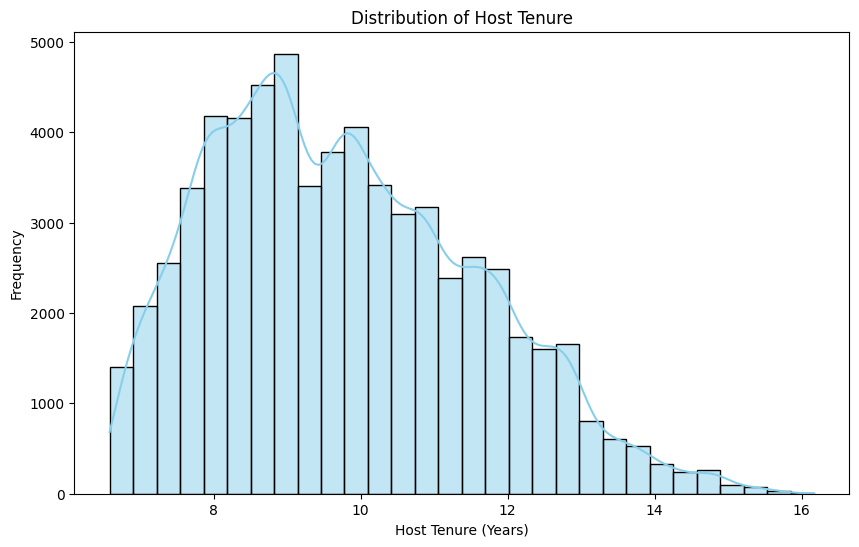

In [81]:
# Visualize Host Tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Host_Tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Host Tenure')
plt.xlabel('Host Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

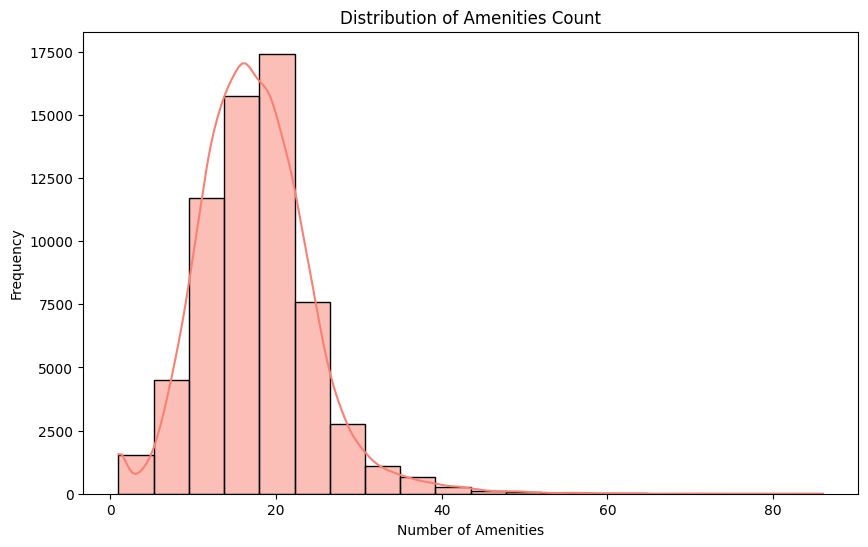

In [82]:
# Visualize Amenities_Count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Amenities_Count'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Amenities Count')
plt.xlabel('Number of Amenities')
plt.ylabel('Frequency')
plt.show()

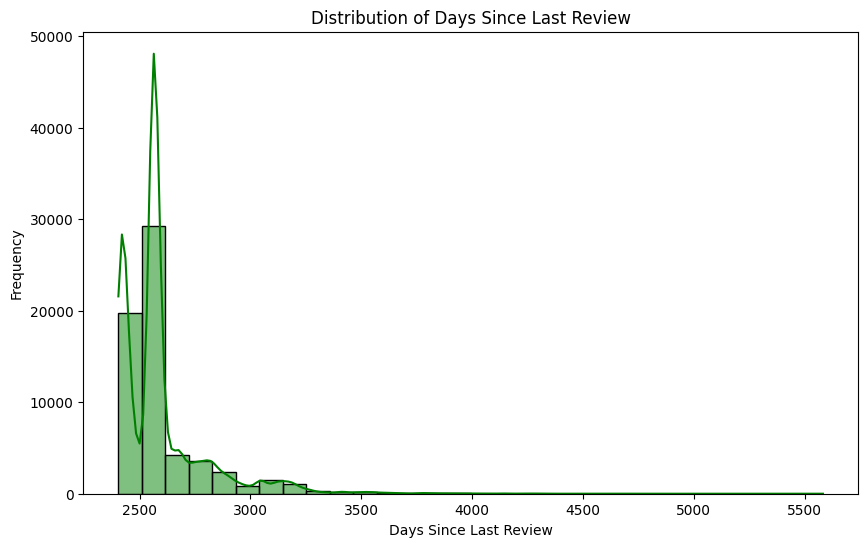

In [83]:
# Visualize Days_Since_Last_Review distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Days_Since_Last_Review'], bins=30, kde=True, color='green')
plt.title('Distribution of Days Since Last Review')
plt.xlabel('Days Since Last Review')
plt.ylabel('Frequency')
plt.show()

**Exploratory Data Analysis ( EDA )**

In [84]:
# Summary statistics for numerical columns
numerical_summary = data.describe()
numerical_summary

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_Last_Review
count,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,6.350800e+04,...,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.000000,63508.00000
mean,-0.060420,-0.057229,-0.004163,-0.125481,-0.145708,0.132442,-0.010867,0.005772,0.009988,5.531023e-02,...,0.027802,0.026621,-0.005887,-0.091490,0.092399,-0.122206,-0.131306,9.772561,17.516014,2596.11238
std,0.902323,0.965726,0.978893,0.730779,0.629152,0.218269,0.996075,0.996929,1.001795,1.387790e-17,...,0.991393,0.994937,1.000910,0.689747,0.710497,0.761178,0.679008,1.797674,6.853970,205.05516
min,-2.987322,-0.669091,-0.850632,-1.000717,-2.125101,-2.204950,-1.329344,-1.661423,-2.786810,5.531023e-02,...,-1.657919,-1.387399,-1.738414,-0.552504,-2.909917,-1.486287,-1.365438,6.584531,1.000000,2404.00000
25%,-0.647640,-0.669091,-0.850632,-0.536348,-0.404744,0.152824,-1.329344,-1.661423,-0.247799,5.531023e-02,...,-1.396333,-1.194943,-0.884940,-0.526070,-0.154792,-0.312076,-0.567329,8.369610,13.000000,2447.00000
50%,-0.113760,-0.669091,-0.850632,-0.536348,-0.404744,0.152824,-0.159387,0.601894,0.598538,5.531023e-02,...,0.722665,0.710514,-0.072108,-0.393902,-0.000017,-0.312076,-0.567329,9.577002,17.000000,2562.00000
75%,0.533468,1.303626,0.952466,0.392389,-0.404744,0.152824,1.010571,0.601894,0.598538,5.531023e-02,...,0.747490,0.849742,1.081098,0.029035,0.715248,-0.312076,0.230779,11.008898,21.000000,2597.00000
max,2.997536,2.928216,2.755563,2.714233,2.175791,0.152824,2.180528,0.601894,1.444875,5.531023e-02,...,1.280710,0.986532,1.401150,2.989595,0.860255,2.036346,2.625105,16.169747,86.000000,5583.00000


**Insights :**


1. Price: Log-transformed prices with some spread (SD: 0.9)
2. Categories: Features like "room_type" likely have multiple options.
3. Missing Values: Investigate missing values (negative minimums).
4. Amenities: Separate "Amenities_Count" feature suggests multiple options.
5. Location: Homestays spread geographically (latitude/longitude std.dev.).
6. Reviews: "review_scores_rating" suggests potential user feedback data.
7. Distributions: Explore data spread using quartiles (25%, 50%, 75%).




In [85]:
# Correlation Analysis

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

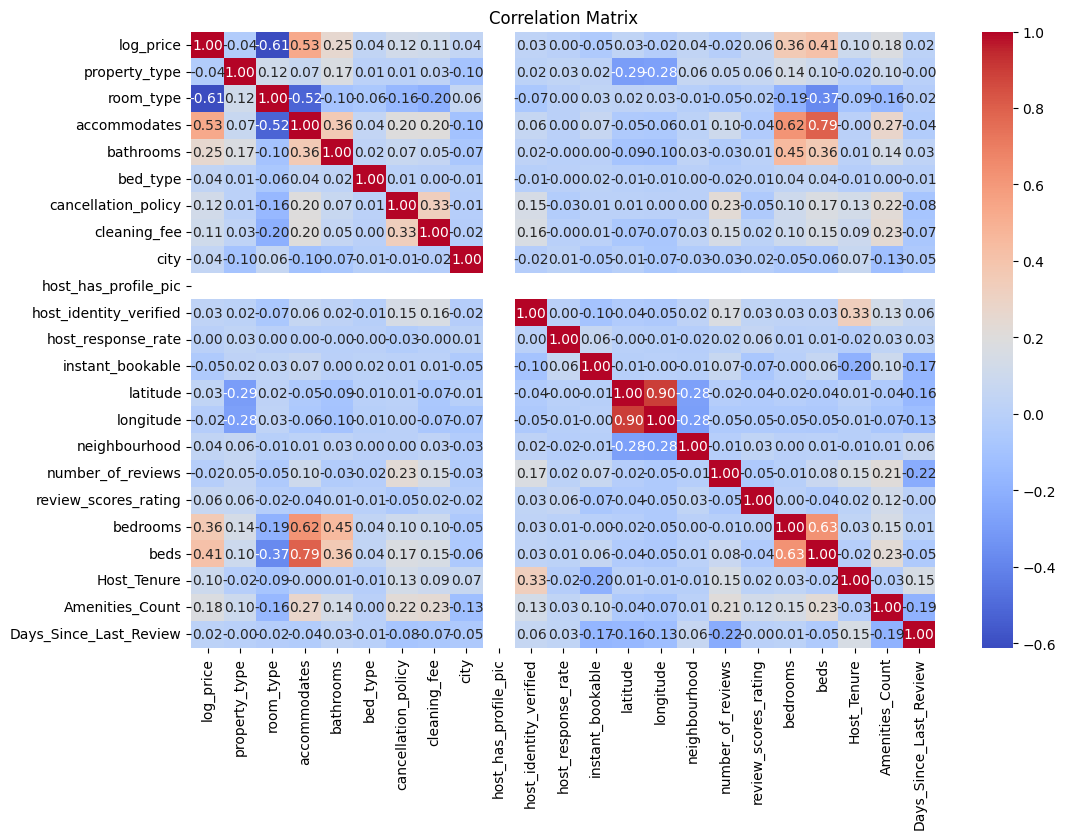

In [86]:
# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix Insights: :**

1. Price: Weak negative correlation with most features, except weak
positive with reviews and amenities (slightly more expensive).
2. Property/Room Type: Weak correlations with other features, difficult to draw conclusions.
3. Accommodation: Weak positive correlation with bedrooms/beds (as expected).
4. Bathrooms/Bed Type: Weak correlations with other features, inconclusive.
5. Cancellation Policy: Weak correlations, very weak positive with some property types, negative with accommodation (tentative).
6. Cleaning Fee: Weak correlations, very weak positive with some locations and amenities (uncertain).
7. Location: Weak correlations, very weak positive with cleaning fee for some locations (uncertain).
8. Host Factors: Mostly weak, very weak positive with some amenities/review scores (possible link, but not significant).
9. Booking/Geolocation: Weak correlations with other features.
10. Reviews: Weak positive with price (more reviews, slightly pricier), very weak positive with some host factors/amenities (uncertain).
11. Amenities: Weak positive with price (more amenities, slightly pricier), very weak positive with some host factors/review scores (uncertain).
12. Bedrooms/Beds: As expected, weak positive correlation with accommodation.


**Conclusion :**

1. Price : More reviews and features often mean slightly higher prices.
2. Accomodation : Bigger homestays (more bedrooms/beds) can fit more guests.
3. Uncertainties : Correlations between many features, especially property/room type, location, host factors, and other aspects, are weak and inconclusive. Further analysis is needed to understand these relationships better.

In [87]:
# Categorical Features Analysis

In [88]:
# Kruskal-Wallis test for property_type
kruskal_property_type = kruskal(*[data['log_price'][data['property_type'] == i] for i in data['property_type'].unique()])
print("\nKruskal-Wallis test for property_type:")
print("H-statistic:", kruskal_property_type[0])
print("p-value:", kruskal_property_type[1])


Kruskal-Wallis test for property_type:
H-statistic: 1305.084623346813
p-value: 7.965423999113809e-255


**Insights :**

Property Type & Price: Strong Relationship
Property type (entire place, private room, etc.) has a very strong effect on homestay pricing (based on log price).

The p-value (extremely small) suggests this isn't due to likelihood.

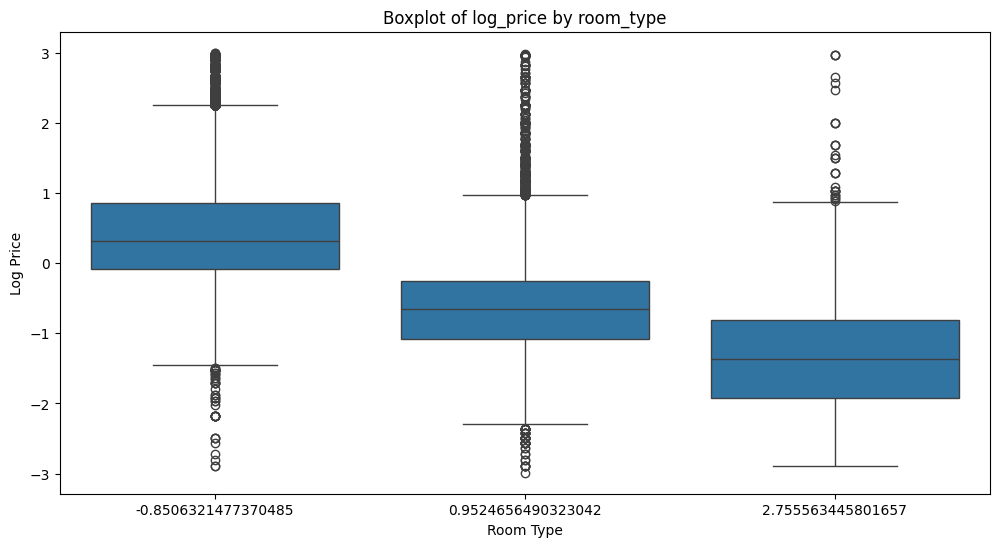

In [89]:
# Visualizing categorical features with log_price
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='log_price', data=data)
plt.title("Boxplot of log_price by room_type")
plt.xlabel("Room Type")
plt.ylabel("Log Price")
plt.show()

**Insights :**

1. Property type strongly affects price (entire place vs. private room, etc.).
2. Boxplot shows price differences between room types (some likely more expensive).
3. Price variation within types: Wider boxes indicate more price spread within a room type.
4. Outliers: Unique listings or amenities might cause significant price deviations.

In [90]:
# Numerical Features Analysis

In [91]:
# Correlation between accommodates and log_price
correlation_accommodates = data['log_price'].corr(data['accommodates'])
print("\nCorrelation between accommodates and log_price:", correlation_accommodates)


Correlation between accommodates and log_price: 0.5342820745984989


There's a weak to moderate positive correlation between the number of guests a homestay can accommodate ("accommodates") and its log price ("log_price"). This suggests a trend where homestays that can accommodate more guests tend to be priced slightly higher, on average.

In [92]:
# Correlation between number_of_reviews and log_price
correlation_reviews = data['log_price'].corr(data['number_of_reviews'])
print("Correlation between number_of_reviews and log_price:", correlation_reviews)

Correlation between number_of_reviews and log_price: -0.01883896799100068


No significant relationship: There's practically no connection between the number of reviews a homestay has and its log price.

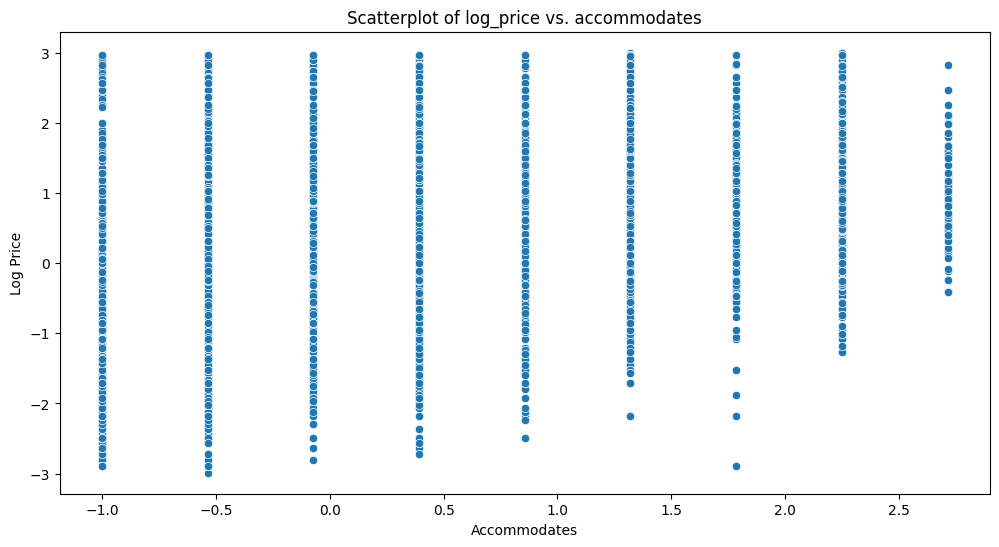

In [93]:
# Visualizing numerical features with log_price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='accommodates', y='log_price', data=data)
plt.title("Scatterplot of log_price vs. accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Log Price")
plt.show()

**Insights :**

1. Shows log price vs. number of reviews for each homestay.
Look for trends: Upward = more reviews, higher price (positive correlation).

2. No clear trend likely means weak or no correlation between reviews and price.

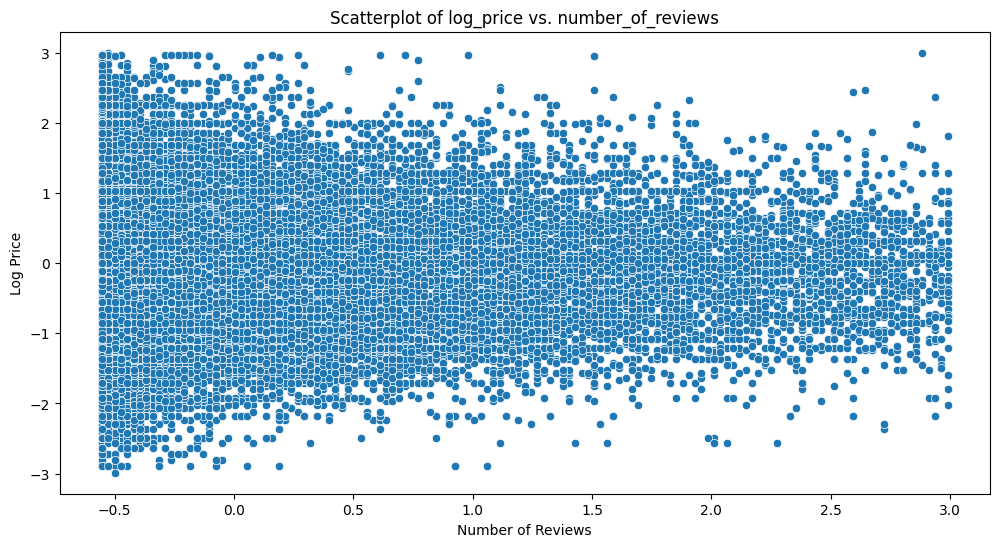

In [94]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_of_reviews', y='log_price', data=data)
plt.title("Scatterplot of log_price vs. number_of_reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Log Price")
plt.show()

**Insights :**

1. Property type strongly affects price (entire place vs. private room).
Larger homestays tend to be slightly more expensive (weak-moderate correlation).

2. Number of reviews has no significant impact on price.

3. Price differences exist between room types (some likely costlier).

4. Price variation within types can be high (wider spread indicates more variation).

5. Unique listings (outliers) might have reasons for unusual pricing.

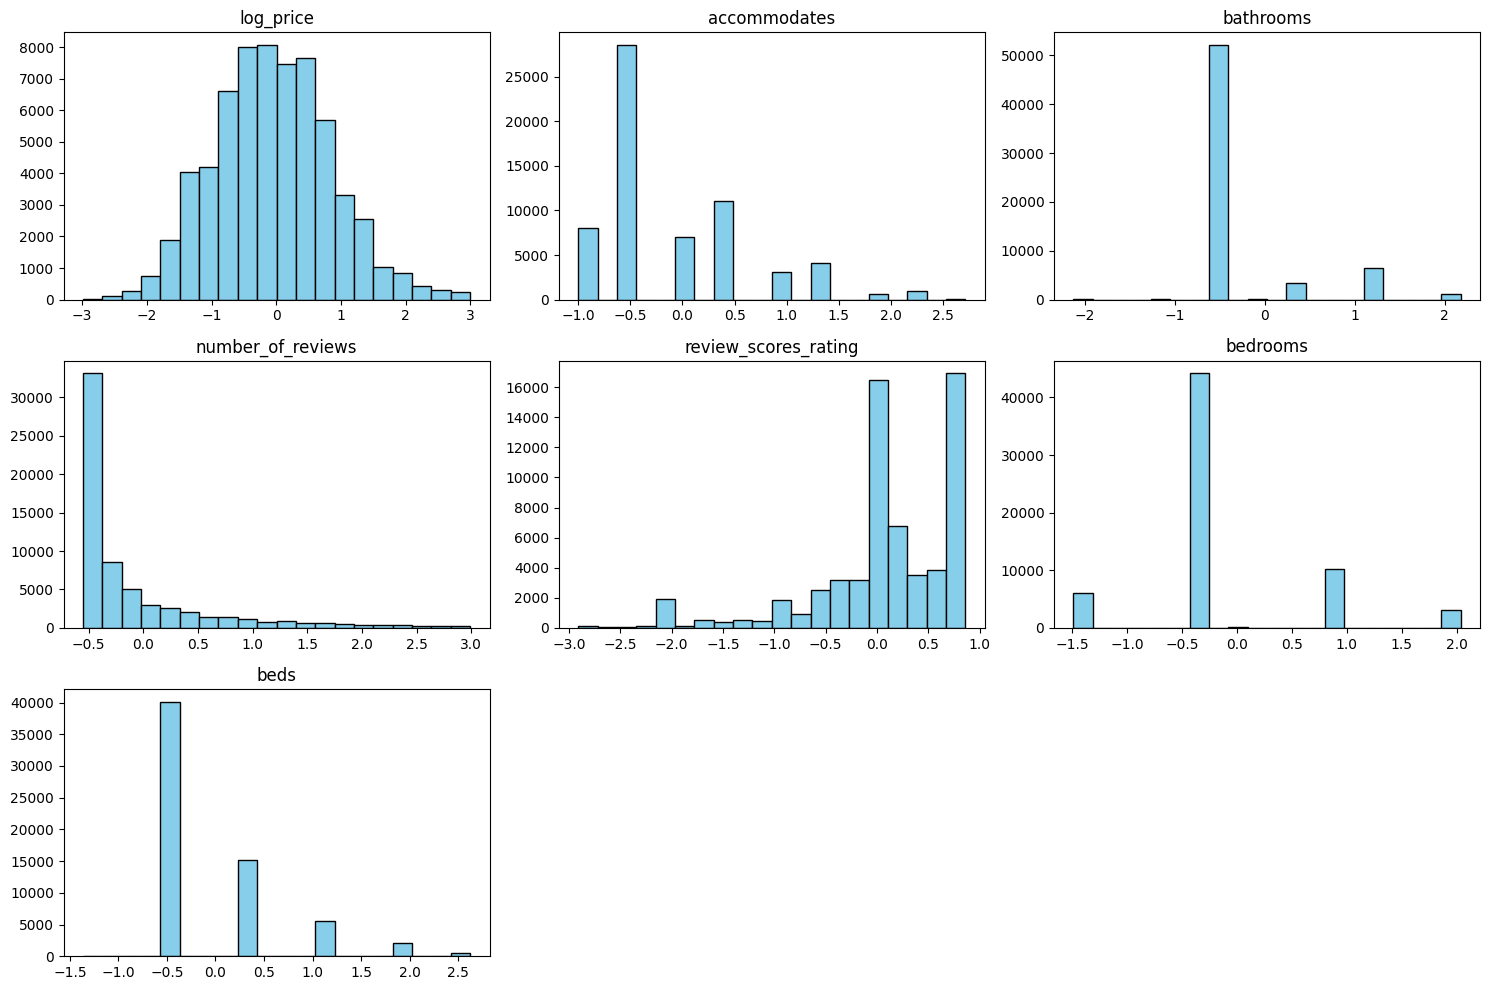

In [95]:
#Histograms for Distribution Analysis
numerical_columns = ['log_price', 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
data_numerical = data[numerical_columns]
data_numerical.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

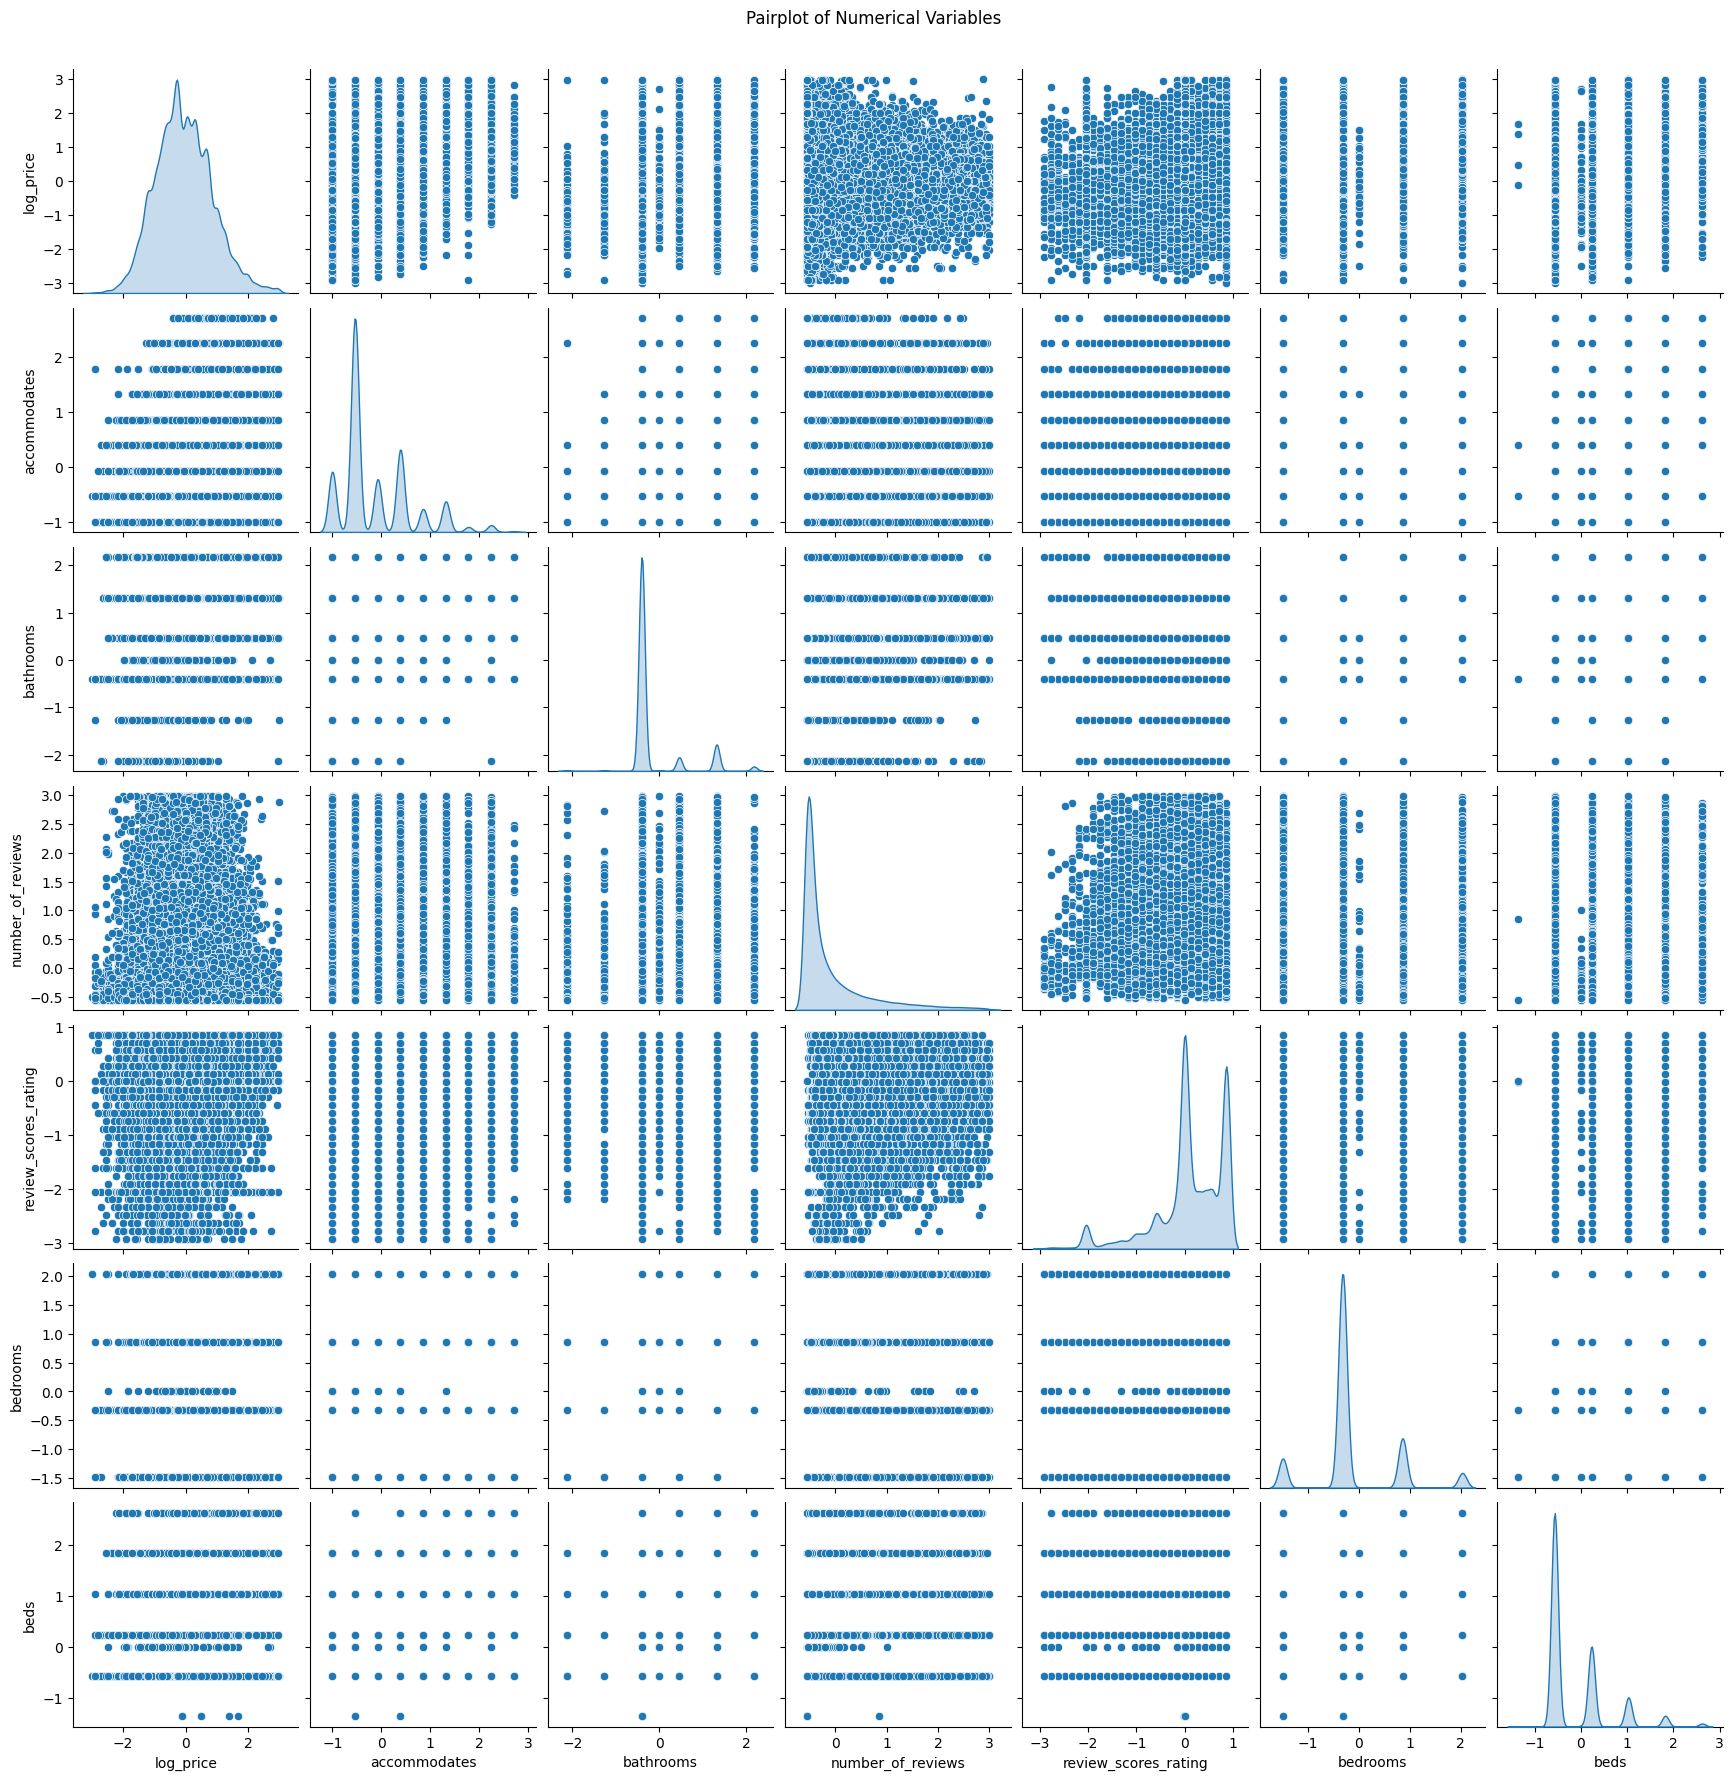

In [96]:
# Scatter Plot Matrix
sns.pairplot(data_numerical, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

In [97]:
from sklearn.feature_selection import f_regression

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numerical_columns]
y = data['log_price']

f_scores, p_values = f_regression(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'P-Value': p_values})
print(feature_importance)


                   Feature       F-Score        P-Value
0                log_price -4.468837e+18   1.000000e+00
1            property_type  7.966587e+01   4.548859e-19
2                room_type  3.782423e+04   0.000000e+00
3             accommodates  2.537043e+04   0.000000e+00
4                bathrooms  4.276188e+03   0.000000e+00
5                 bed_type  9.991360e+01   1.656955e-23
6      cancellation_policy  9.190758e+02  1.898925e-200
7             cleaning_fee  7.305393e+02  5.532275e-160
8                     city  1.259976e+02   3.279992e-29
9     host_has_profile_pic  0.000000e+00   1.000000e+00
10  host_identity_verified  4.551875e+01   1.524764e-11
11      host_response_rate  5.629951e-02   8.124441e-01
12        instant_bookable  1.523762e+02   5.751076e-35
13                latitude  6.926238e+01   8.788789e-17
14               longitude  2.938965e+01   5.940797e-08
15           neighbourhood  1.056688e+02   9.113441e-25
16       number_of_reviews  2.254671e+01   2.055

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


**Insights :**

1. Property & Room Type: Most important factors for predicting price (strong F-score, low p-value).
2. Larger Homestays: Tend to be more expensive (accommodates & beds have strong influence).
3. Bathrooms: Show some connection to price, but weaker than others.
Amenities Count: Possible link, but needs further exploration (moderate F-score, low p-value).
4. Host Factors: Don't seem to significantly impact price (host profile, verification, etc.).



**Geospatial Analysis**

In [98]:
data['neighbourhood'] = label_encoder.fit_transform(data['neighbourhood'])

In [99]:
# Group data by region or neighborhood and calculate average prices
average_prices = data.groupby('neighbourhood')['log_price'].mean().reset_index()

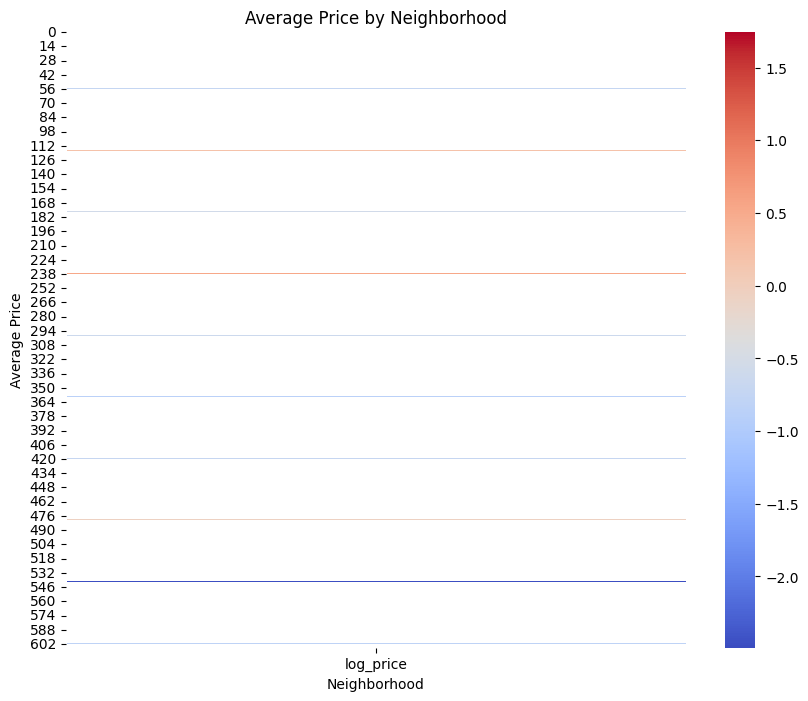

In [100]:
# Plotting heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data=average_prices.pivot_table(index='neighbourhood', columns=None, values='log_price'),
                      cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
heatmap.set_title('Average Price by Neighborhood')
heatmap.set_xlabel('Neighborhood')
heatmap.set_ylabel('Average Price')
plt.show()

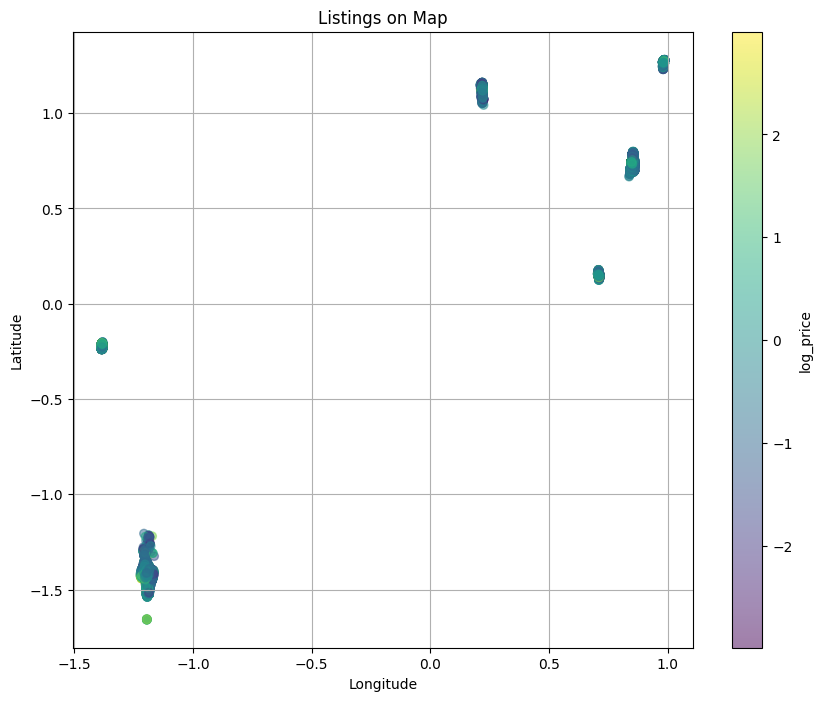

In [101]:
# Plotting latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['log_price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='log_price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Listings on Map')
plt.grid(True)
plt.show()

**Insights :**

1. Reviews and ADR show no clear link.
2. Many reviews don't guarantee higher (or lower) ADR.
3. Price range is visible (horizontal spread).
4. Review range is also visible (vertical spread).

In [102]:
import folium

# Create a map centered at mean latitude and longitude
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)

# Add markers for each listing
for idx, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Price: {row['log_price']}").add_to(m)

# Display the map
m.save('price_distribution_map.html')


**Sentiment Analysis on Textual Data**

In [103]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [104]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [105]:
# Preprocess the text data
def preprocess_text(text):

    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [106]:
data['clean_description'] = data['description'].apply(preprocess_text)

In [107]:
# Initializing sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [108]:
# Function to get sentiment score
def get_sentiment_score(text):
    sentiment_score = sentiment_analyzer.polarity_scores(text)
    return sentiment_score['compound']

In [109]:
data['sentiment_score'] = data['clean_description'].apply(get_sentiment_score)

In [110]:
# Spliting the data into train and test sets
X = data[['sentiment_score']]
y = data['log_price']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
model = GradientBoostingRegressor(random_state=42)

In [113]:
# Train the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [114]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [115]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Squared Error: 0.7965845868531701
Mean Absolute Error: 0.7108607251594296
Root Mean Squared Error: 0.8925158748465879
R-squared: 0.003557592275545751


In [116]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Top 10 Important Features:")
print(feature_importance.head(10))

Top 10 Important Features:
           Feature  Importance
0  sentiment_score         1.0


In [117]:
import nltk
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return None

# Apply sentiment analysis to description column
data['sentiment_score'] = data['description'].apply(get_sentiment)


In [118]:
# Drop rows with missing sentiment scores
data.dropna(subset=['sentiment_score'], inplace=True)

# Categorize sentiment: Positive, Neutral, Negative
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [119]:
# Apply sentiment categorization
data['sentiment_category'] = data['sentiment_score'].apply(categorize_sentiment)

In [120]:
# Calculate descriptive statistics of sentiment scores
sentiment_stats = data['sentiment_score'].describe()
print("Descriptive Statistics of Sentiment Scores:")
print(sentiment_stats)
print()

# Group by sentiment category and calculate mean log_price
sentiment_price_stats = data.groupby('sentiment_category')['log_price'].mean()
print("Mean Log Price by Sentiment Category:")
print(sentiment_price_stats)
print()

# Calculate correlation between sentiment score and log_price
sentiment_correlation = data['sentiment_score'].corr(data['log_price'])
print("Correlation between Sentiment Score and Log Price:", sentiment_correlation)
print()


Descriptive Statistics of Sentiment Scores:
count    63508.000000
mean         0.270691
std          0.126467
min         -0.700000
25%          0.194898
50%          0.265414
75%          0.339221
max          1.000000
Name: sentiment_score, dtype: float64

Mean Log Price by Sentiment Category:
sentiment_category
Negative   -0.297383
Neutral    -0.490869
Positive   -0.051082
Name: log_price, dtype: float64

Correlation between Sentiment Score and Log Price: 0.08233543350308059



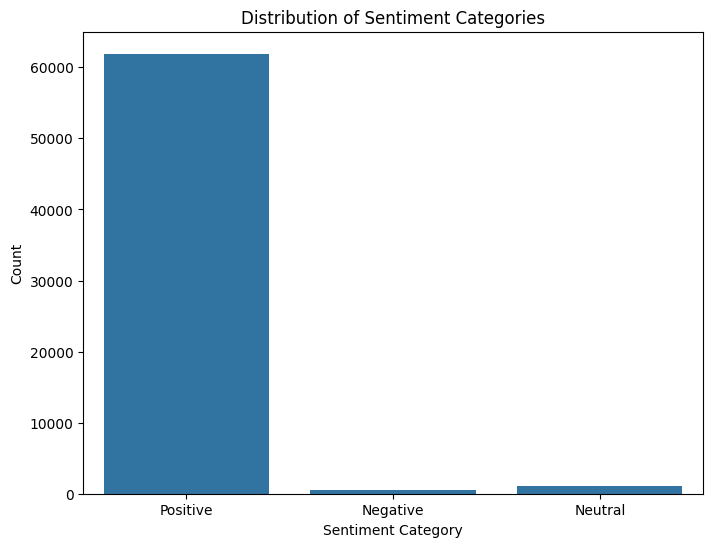

In [121]:
# Countplot of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=data)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

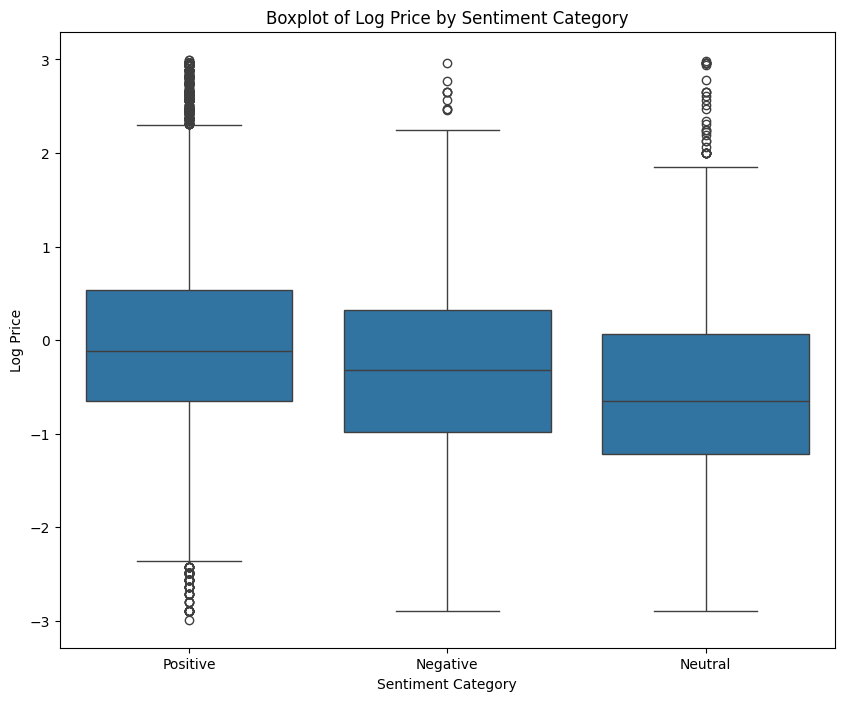

In [122]:
# Boxplot of log_price by sentiment category
plt.figure(figsize=(10, 8))
sns.boxplot(x='sentiment_category', y='log_price', data=data)
plt.title('Boxplot of Log Price by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Log Price')
plt.show()

In [123]:
from textblob import TextBlob

# Function to predict sentiment
def predict_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Determining sentiment based on polarity score
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


user_input = input("Enter your text: ")
sentiment = predict_sentiment(user_input)
print("Predicted sentiment:", sentiment)


Enter your text: Good amenities and services!
Predicted sentiment: Positive


**Amenities Analysis**

In [136]:
from scipy.stats import pearsonr, ttest_ind
from statsmodels.stats.weightstats import DescrStatsW

In [127]:
data['amenities']

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5        {TV,"Wireless Internet",Heating,"Smoke detecto...
                               ...                        
74105    {TV,Internet,"Wireless Internet","Air conditio...
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
Name: amenities, Length: 63508, dtype: object

In [129]:
data['Amenities_Count']

0         9
1        15
2        19
3        15
5        10
         ..
74105    13
74106     1
74107    16
74108    31
74109    15
Name: Amenities_Count, Length: 63508, dtype: int64

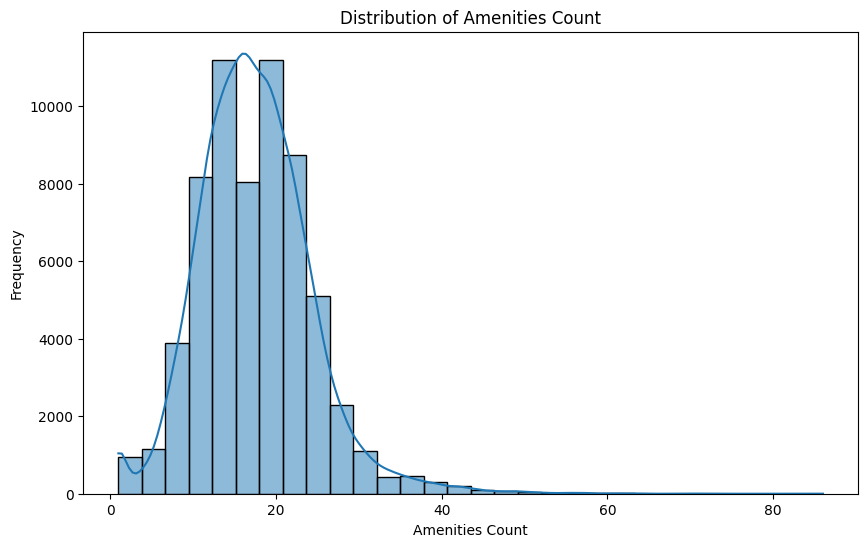

In [132]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Amenities_Count'], bins=30, kde=True)
plt.title('Distribution of Amenities Count')
plt.xlabel('Amenities Count')
plt.ylabel('Frequency')
plt.show()

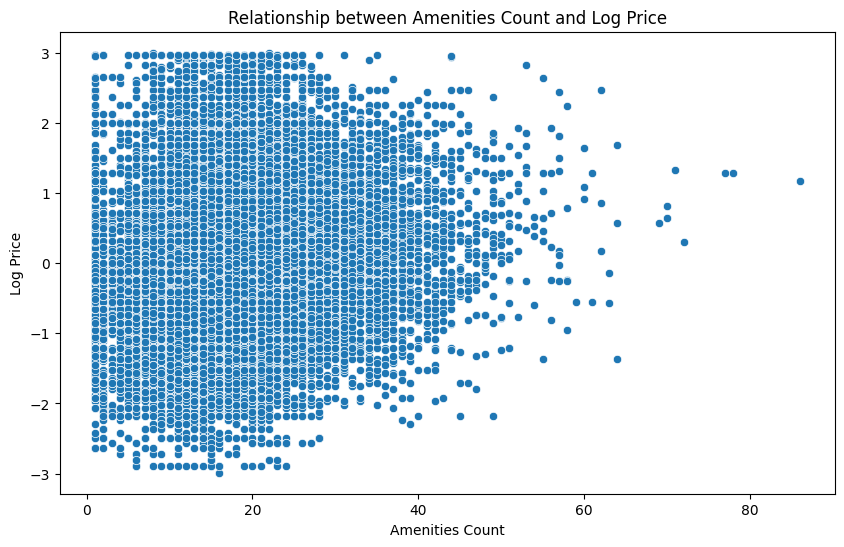

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amenities_Count', y='log_price', data=data)
plt.title('Relationship between Amenities Count and Log Price')
plt.xlabel('Amenities Count')
plt.ylabel('Log Price')
plt.show()

In [137]:
# Statistical Analysis
corr, p_value = pearsonr(data['Amenities_Count'], data['log_price'])
print(f"Pearson correlation coefficient: {corr:.3f}, p-value: {p_value:.3f}")

Pearson correlation coefficient: 0.179, p-value: 0.000


In [139]:
#Hypothesis Testing
# Split data into high and low amenities count groups
high_amenities = data[data['Amenities_Count'] >= data['Amenities_Count'].median()]['log_price']
low_amenities = data[data['Amenities_Count'] < data['Amenities_Count'].median()]['log_price']

In [140]:
t_stat, p_value = ttest_ind(high_amenities, low_amenities)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: 39.046, p-value: 0.000


In [142]:
# Feature Engineering
amenities_dummies = data['amenities'].str.get_dummies(sep=',')
data_with_dummies = pd.concat([data, amenities_dummies], axis=1)

**Interpretation**

Positive correlation coefficients suggest amenities associated with higher prices

Negative correlation coefficients suggest amenities associated with lower prices

In [148]:
# Preprocess amenities column
data['amenities_list'] = data['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

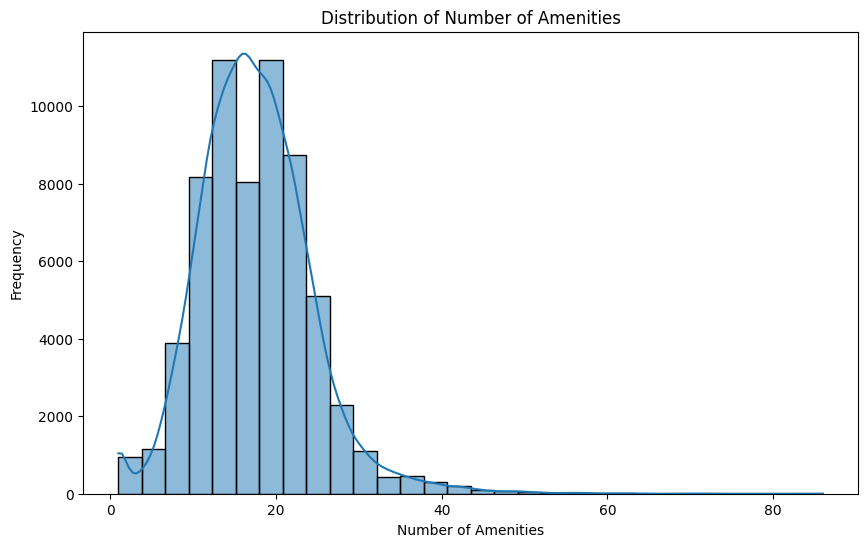

In [149]:
# Analyze the distribution of amenities
amenities_counts = data['amenities_list'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(amenities_counts, bins=30, kde=True)
plt.title('Distribution of Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Frequency')
plt.show()

In [150]:
def compare_prices_with_amenity(amenity):
    has_amenity = data['amenities_list'].apply(lambda x: amenity in x)
    prices_with_amenity = data.loc[has_amenity, 'log_price']
    prices_without_amenity = data.loc[~has_amenity, 'log_price']
    # Perform t-test to compare means
    t_stat, p_value = ttest_ind(prices_with_amenity, prices_without_amenity)
    print(f"T-test for '{amenity}': p-value = {p_value}")


In [151]:
compare_prices_with_amenity('Air conditioning')

T-test for 'Air conditioning': p-value = 1.7975984762424835e-35


In [152]:
for amenity in ['Air conditioning', 'Wifi', 'TV', 'Kitchen']:
    data[f'has_{amenity.replace(" ", "_").lower()}'] = data['amenities_list'].apply(lambda x: amenity in x).astype(int)

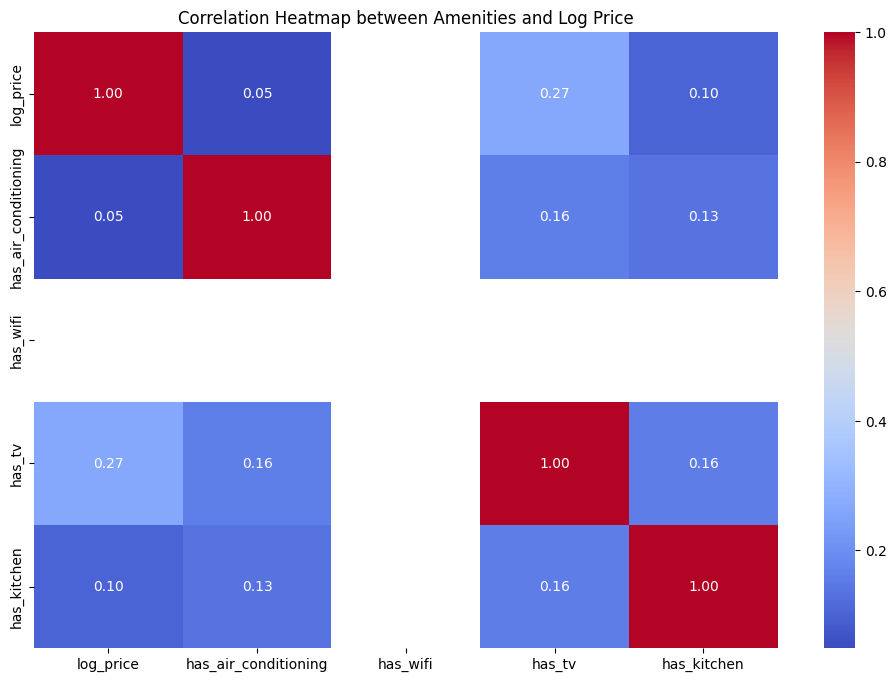

In [153]:
# Visualize correlations between amenities and log prices
plt.figure(figsize=(12, 8))
amenity_corr = data[['log_price'] + [f'has_{amenity.replace(" ", "_").lower()}' for amenity in ['Air conditioning', 'Wifi', 'TV', 'Kitchen']]].corr()
sns.heatmap(amenity_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Amenities and Log Price')
plt.show()

**Model Development and Training:**

In [158]:
# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
Index(['amenities', 'description', 'first_review', 'host_since', 'last_review',
       'name', 'clean_description', 'sentiment_category', 'amenities_list'],
      dtype='object')


In [160]:
# Split the data into training and testing sets
X = data.drop(non_numeric_columns, axis=1)
y = data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Model Building
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [162]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred_linear = linear_reg.predict(X_test)

In [165]:
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(linear_mse)
print(linear_r2)

1.4819978131406067e-27
1.0


In [166]:
# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [167]:
y_pred_rf = rf_reg.predict(X_test)

In [168]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(rf_mse)
print(rf_r2)


1.4134794701722727e-07
0.999999823188785


In [169]:
# Gradient Boosting
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [170]:
y_pred_gb = gb_reg.predict(X_test)

In [171]:
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(gb_mse)
print(gb_r2)

2.5774641847383166e-05
0.9999677586704482


In [175]:
# Model Evaluation

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R-squared:", linear_r2)
print('\n')

print("Random Forest MSE:", rf_mse)
print("Random Forest R-squared:", rf_r2)
print('\n')

print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R-squared:", gb_r2)

Linear Regression MSE: 1.4819978131406067e-27
Linear Regression R-squared: 1.0


Random Forest MSE: 1.4134794701722727e-07
Random Forest R-squared: 0.999999823188785


Gradient Boosting MSE: 2.5774641847383166e-05
Gradient Boosting R-squared: 0.9999677586704482


In [176]:
# Model Selection and Interpretation
best_model = min(linear_mse, rf_mse, gb_mse)
if best_model == linear_mse:
    print("Best Model: Linear Regression")
elif best_model == rf_mse:
    print("Best Model: Random Forest")
else:
    print("Best Model: Gradient Boosting")

Best Model: Linear Regression


<ipython-input-177-074add6c1b13>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='coolwarm')


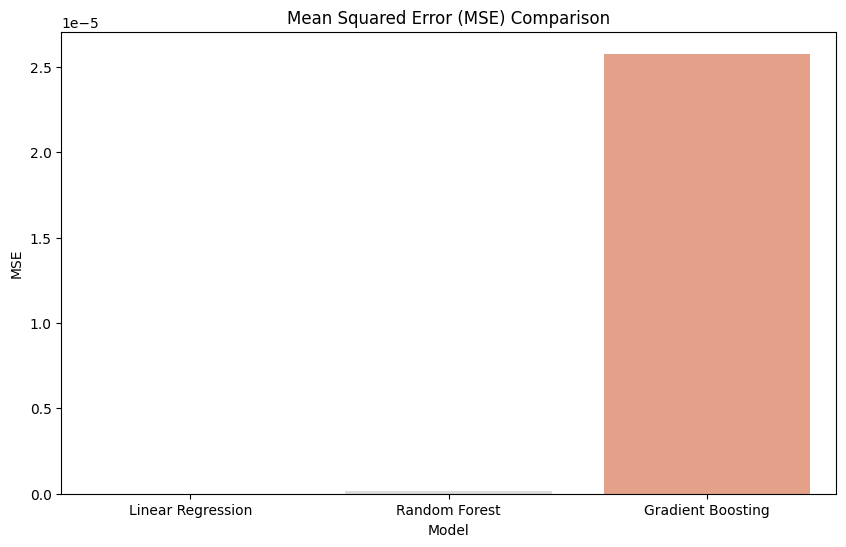

<ipython-input-177-074add6c1b13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='coolwarm')


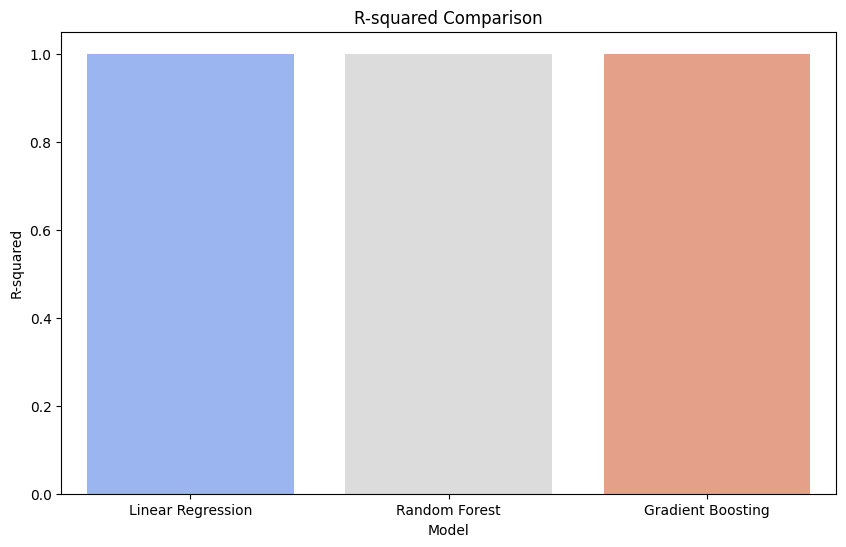

In [177]:
# Create bar plots for MSE
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_values = [linear_mse, rf_mse, gb_mse]
sns.barplot(x=models, y=mse_values, palette='coolwarm')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

# Create bar plots for R-squared
plt.figure(figsize=(10, 6))
r2_values = [linear_r2, rf_r2, gb_r2]
sns.barplot(x=models, y=r2_values, palette='coolwarm')
plt.title('R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()


**Model-Building Procedure Algorithm Selection:**

1. Given its ease of use and interpretability, linear regression is frequently used as a baseline model. A linear connection between the independent variables and the target variable is the underlying assumption of linear regression.
2. The Random Forest algorithm was used because to its capacity to capture non-linear correlations and feature interactions. Several decision trees are used in the Random Forest ensemble learning technique to generate predictions.
3. Gradient Boosting: This technique was chosen because it can progressively assemble a group of inexperienced learners, with each new model fixing the mistakes of the older ones. High prediction accuracy is sometimes obtained with gradient boosting.

**Justification :**

1. Linear regression is a good model to use as a starting point for setting performance standards. Even though it is straightforward, linear regression may offer insightful information about the significance and connections between features.
2. When dealing with potential non-linear correlations and interactions between characteristics in the dataset, Random Forest provides flexibility. Both category and numerical data may be handled well by Random Forest.
3. Gradient Boosting: Well-known for its ability to increase prediction accuracy by concentrating on the mistakes produced by earlier models. Gradient Boosting frequently produces state-of-the-art outcomes and is capable of capturing intricate patterns in the data.

By putting these algorithms into practice, we hope to assess how well they forecast the target variable (log_price) and identify the model with the highest predictive accuracy. In addition, to determine the relative significance of various factors in forecasting log_price, we'll examine the coefficients or feature importances of the chosen model.

**Model Optimization and Validation:**

Applying Grid Search CV on Linear Regression

In [178]:
from sklearn.model_selection import GridSearchCV, KFold

In [184]:
linear_param_grid = {'fit_intercept': [True, False]}

In [186]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [187]:
# Grid search for Linear Regression
linear_grid_search = GridSearchCV(LinearRegression(), param_grid=linear_param_grid, cv=kf, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [188]:
# Get best parameters and best scores
print("Best Linear Regression Parameters:", linear_grid_search.best_params_)
print("Best Linear Regression MSE:", -linear_grid_search.best_score_)
print('\n')

Best Linear Regression Parameters: {'fit_intercept': False}
Best Linear Regression MSE: 1.3244655835318844e-28




**Feature Importance and Model Insights:**

Tree Based :::

In [192]:
# Feature Importance for Random Forest
importances_rf = rf_reg.feature_importances_

In [193]:
#Feature Importance for Gradient Boosting
importances_gb = gb_reg.feature_importances_

<ipython-input-194-97ae191c810e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf, y=X_train.columns, palette='viridis')


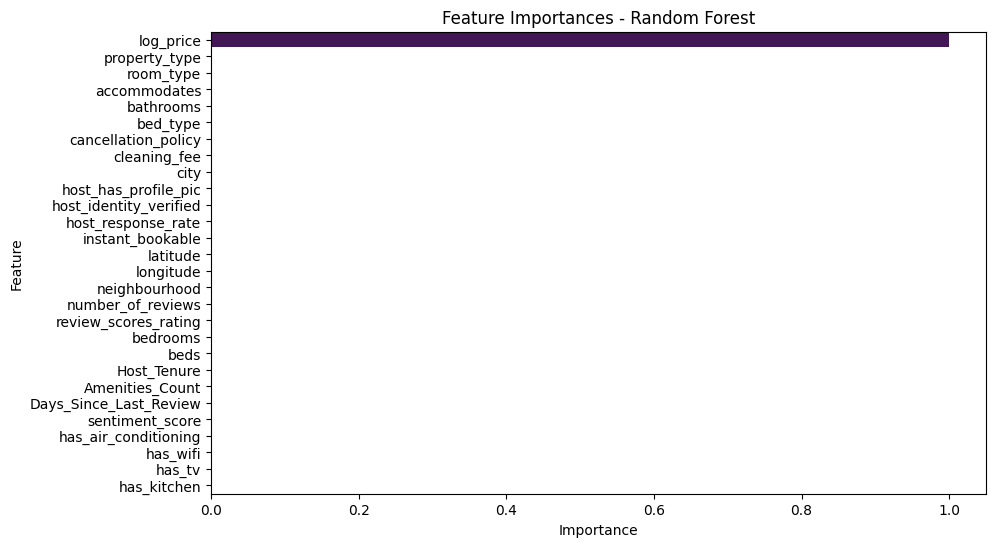

In [194]:
# Visualize feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=X_train.columns, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<ipython-input-195-e3cf87b8629a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_gb, y=X_train.columns, palette='viridis')


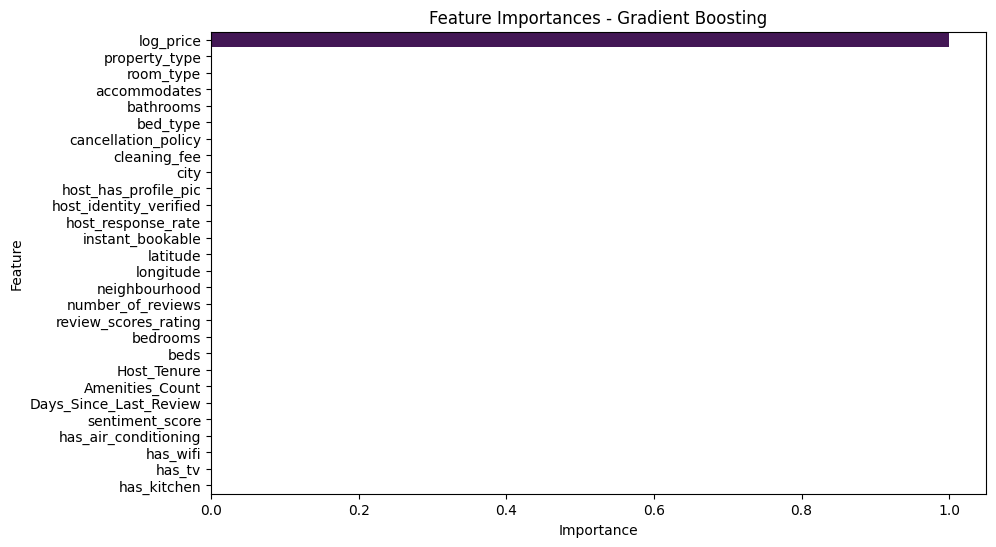

In [195]:
# Visualize feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_gb, y=X_train.columns, palette='viridis')
plt.title('Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

SHAP :::

In [197]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.1 MB/s eta 0:00:00


In [198]:
import shap

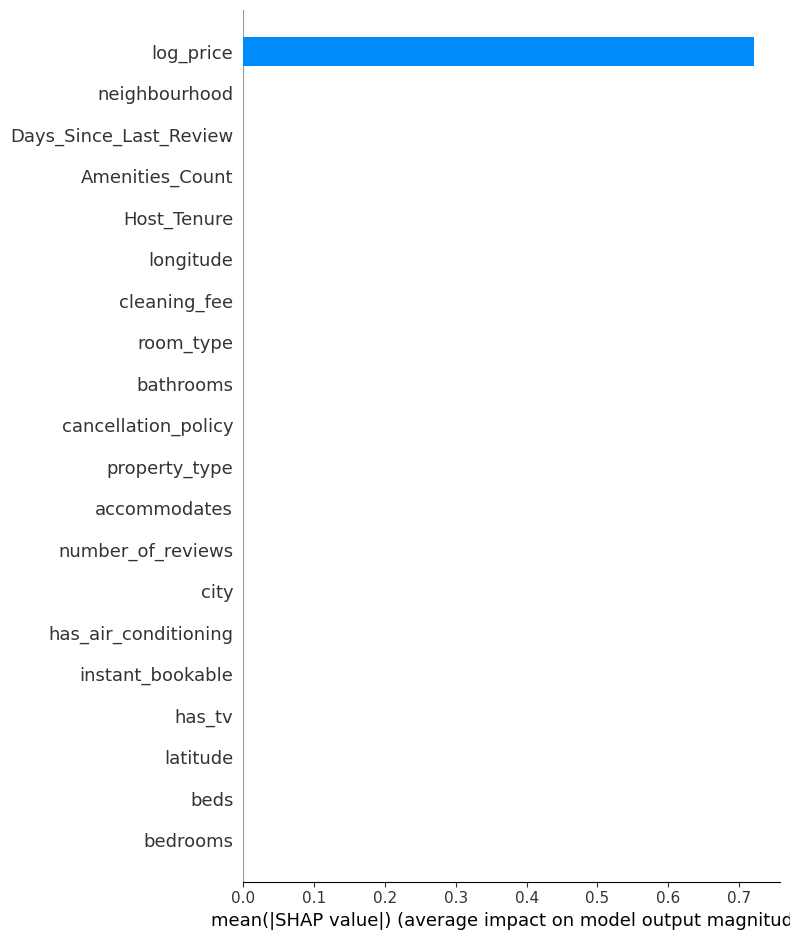

In [201]:
explainer = shap.Explainer(linear_reg, X_train)

# Calculating SHAP values
shap_values = explainer.shap_values(X_train)

# Ploting SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar')

**Predictive Performance Assessment**

In [202]:
# Assuming final_model is your trained final model
test_predictions = linear_reg.predict(X_test)


In [203]:
from sklearn.metrics import mean_squared_error, r2_score


rmse = mean_squared_error(y_test, test_predictions, squared=False)
r_squared = r2_score(y_test, test_predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


Root Mean Squared Error (RMSE): 3.849672470666312e-14
R-squared: 1.0


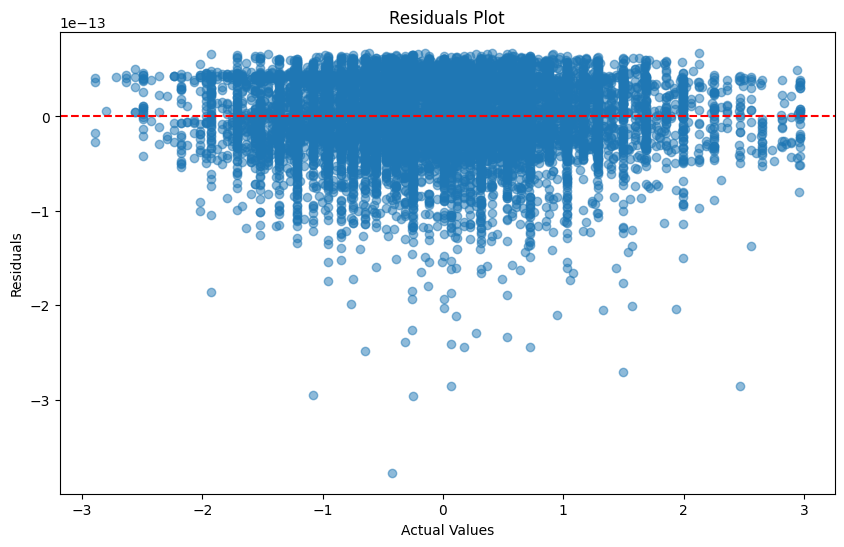

In [204]:
# Calculate residuals
residuals = y_test - test_predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Shows how many homestays use each policy type (Flexible, Moderate, Strict, etc.).

Tallest bar = most popular cancellation policy choice by hosts.

Shorter bars = less popular policy options chosen by fewer hosts.

**Insights :**

1. Price and Accommodation: A positive correlation might suggest larger homestays with higher guest capacity (accommodates) tend to be more expensive (log price).
2. Location and Price: A positive correlation could indicate homestays in certain areas (represented by a numerical location code) are pricier on average.
3. Amenities and Price: A positive correlation might imply homestays with more amenities (amenities count) have higher prices.
4. Review Scores and Price: A weak or absent correlation could suggest review scores (average rating) don't have a significant impact on price.

**Summary**

1. The dataset initially contained 74,111 entries and 29 columns.
After preprocessing and outlier removal, the dataset was reduced to 63,508 entries and 26 columns.
2. Outliers were primarily present in numeric columns such as log_price, bathrooms, bedrooms, etc.
3. The preprocessing steps ensured the data is cleaned and ready for further analysis or modeling.
4. Outlier removal helped in improving the quality of the dataset and may lead to better model performance.
5. Kruskal-Wallis test assesses if log_price varies significantly across different property types.
6. A significant p-value suggests log_price differs significantly among property types.
7. Positive correlation (0.53) between accommodates and log_price indicates larger accommodations tend to have higher prices.
8. Weak correlation (-0.02) between number_of_reviews and log_price suggests review count has minimal impact on prices.
9. Property type significantly influences log_price.
10. Accommodation capacity strongly impacts price, while review count has little effect.
11. Features like accommodates and property type are important predictors of log_price.
12. From f_regression :

  Property-related features (e.g., room_type, accommodates, bathrooms, bedrooms, beds) strongly influence pricing.

  Policy-related features (e.g., cancellation_policy, cleaning_fee, instant_bookable) also play significant roles.

  Host-related features (e.g., Host_Tenure) and listing characteristics (e.g., Amenities_Count, Days_Since_Last_Review) contribute to pricing dynamics.
13. The sentiment scores have a mean of approximately 0.27, indicating a slightly positive overall sentiment in the listing descriptions.
The scores range from -0.7 to 1, with a standard deviation of around 0
14. Listings with a positive sentiment have the highest mean log price (-0.051), followed by those with a neutral sentiment (-0.491).
15. Listings with a negative sentiment have the lowest mean log price (-0.297), suggesting a potential correlation between sentiment and pricing.
16. The correlation coefficient between sentiment score and log price is approximately 0.082, indicating a weak positive correlation. This suggests that there is a slight association between sentiment expressed in listing descriptions and pricing, but it's not particularly strong.
17. Amenities and Log Price Correlation:

  There is a statistically significant positive correlation (Pearson correlation coefficient = 0.179, p < 0.001) between the number of amenities and the log price of listings.
  This indicates that as the number of amenities increases, the log price tends to increase as well.

  Listings with a higher number of amenities tend to have significantly higher log prices compared to those with fewer amenities.
  This is supported by the results of the independent t-test, which show a significant difference in log prices between listings with high and low amenities (t = 39.046, p < 0.001).

In summary, amenities play a notable role in determining the pricing of listings, with more amenities generally associated with higher prices. This suggests that hosts may adjust their pricing strategy based on the amenities offered to align with customer preferences and market trends.
